In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [ ]:
iris = sns.load_dataset(name='iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Question 01**

In [ ]:
species = list(iris['species'].unique())
attributes = iris.columns[:-1]

for col in attributes:
  c = iris[col]
  M = np.mean(c)
  V = np.sum((c-M)**2)/(len(c)-1)
  iris[col] = (c-M)/np.sqrt(V)

def cov_corcoef(c1,c2):
  n = len(c1)
  m1 = np.mean(c1)
  v1 = np.sum((c1-m1)**2)/(n-1)
  m2 = np.mean(c2)
  v2 = np.sum((c2-m2)**2)/(n-1)
  cov = np.dot((c1-m1),(c2-m2))/(n-1)
  corcoef = cov/np.sqrt(v1*v2)
  return cov,corcoef

cov_matrix = np.zeros((len(attributes),len(attributes)))
for i in range(len(attributes)):
  for j in range(len(attributes)):
    cov_matrix[i,j] = cov_corcoef(iris[attributes[i]],iris[attributes[j]])[0]
print(list(attributes))
print()
print(cov_matrix)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [ ]:
cov_matrix=np.cov(iris.drop('species',axis=1))
standardized_data=((iris.drop('species',axis=1))-(iris.drop('species',axis=1)).mean())/((iris.drop('species',axis=1)).std())
print(np.cov(standardized_data.T))

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


**Question 02**

In [ ]:
eigvals,eigvecs=np.linalg.eig(np.cov(standardized_data.T))
print('Eigenvalues: ')
print(eigvals)       #The eigenvalues are already sorted, hence the eigenvector matrix is already in principal component form.
print('Eigenvector matrix is: ')
print(eigvecs)
comp=eigvecs.T  #I do this to finally print the individual principal components, as they were present as rows
print()
print('The four principal components are')
for i in range(len(comp)):
  print(f'Principal component {i+1}:',comp[i])


Eigenvalues: 
[2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvector matrix is: 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

The four principal components are
Principal component 1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Principal component 2: [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
Principal component 3: [-0.71956635  0.24438178  0.14212637  0.63427274]
Principal component 4: [ 0.26128628 -0.12350962 -0.80144925  0.52359713]


**Question 03**

In [ ]:
#Dimensionality reduction - we do this by calculating dot product
data_2d=standardized_data.dot(eigvecs[:,:2])
data_2d["species"]=iris["species"]
print('Two-dimensional data')
data_2d

Two-dimensional data


,0,1,species
0,-2.257141,-0.478424,setosa
1,-2.074013,0.671883,setosa
2,-2.356335,0.340766,setosa
3,-2.291707,0.595400,setosa
4,-2.381863,-0.644676,setosa
...,...,...,...
145,1.864258,-0.385674,virginica
146,1.559356,0.893693,virginica
147,1.516091,-0.268171,virginica
148,1.368204,-1.007878,virginica


In [ ]:
data_3d=standardized_data.dot(eigvecs[:,:3])
data_3d['species']=iris['species']
print('Three-dimensional data')
data_3d

Three-dimensional data


,0,1,2,species
0,-2.257141,-0.478424,-0.127280,setosa
1,-2.074013,0.671883,-0.233826,setosa
2,-2.356335,0.340766,0.044054,setosa
3,-2.291707,0.595400,0.090985,setosa
4,-2.381863,-0.644676,0.015686,setosa
...,...,...,...,...
145,1.864258,-0.385674,0.255418,virginica
146,1.559356,0.893693,-0.026283,virginica
147,1.516091,-0.268171,0.179577,virginica
148,1.368204,-1.007878,0.930279,virginica


**Question 04**

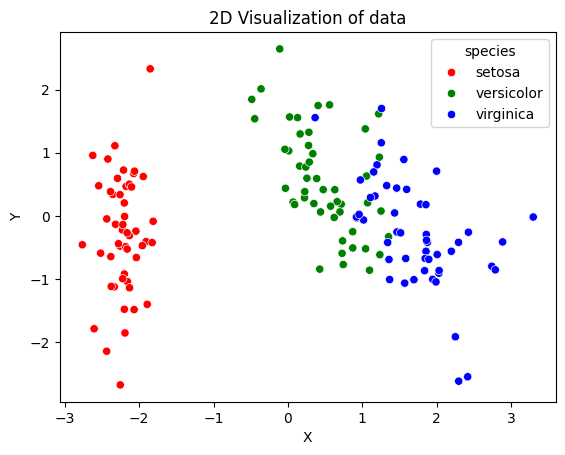

In [ ]:
sns.scatterplot(data=data_2d,x=0,y=1,hue="species",palette=['r','g','b'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Visualization of data')
plt.show()

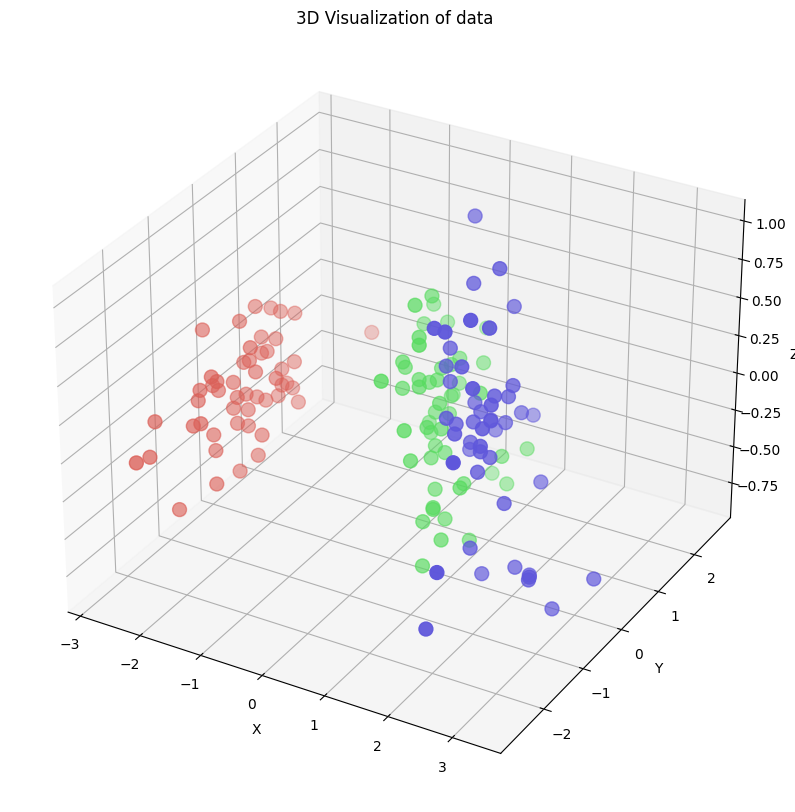

In [ ]:
species=iris['species']
unique_species = species.unique()
palette = sns.color_palette("hls", len(unique_species))
species_color_map = dict(zip(unique_species, palette))
colors = [species_color_map[sp] for sp in species]

x = data_3d[0]
y = data_3d[1]
z = data_3d[2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of data')
plt.show()

Discussed With

Jaskirat Singh Maskeen  
23110146


Satchit Velankar

23110291